In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
refs= read.csv("RQ1-no-of-refactorings-per-class.csv")
summary(refs)

   class.Type        count         
 DAC    : 1318   Min.   :    1.00  
 Regular:81873   1st Qu.:    1.00  
                 Median :    2.00  
                 Mean   :   30.92  
                 3rd Qu.:    3.00  
                 Max.   :29337.00  

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

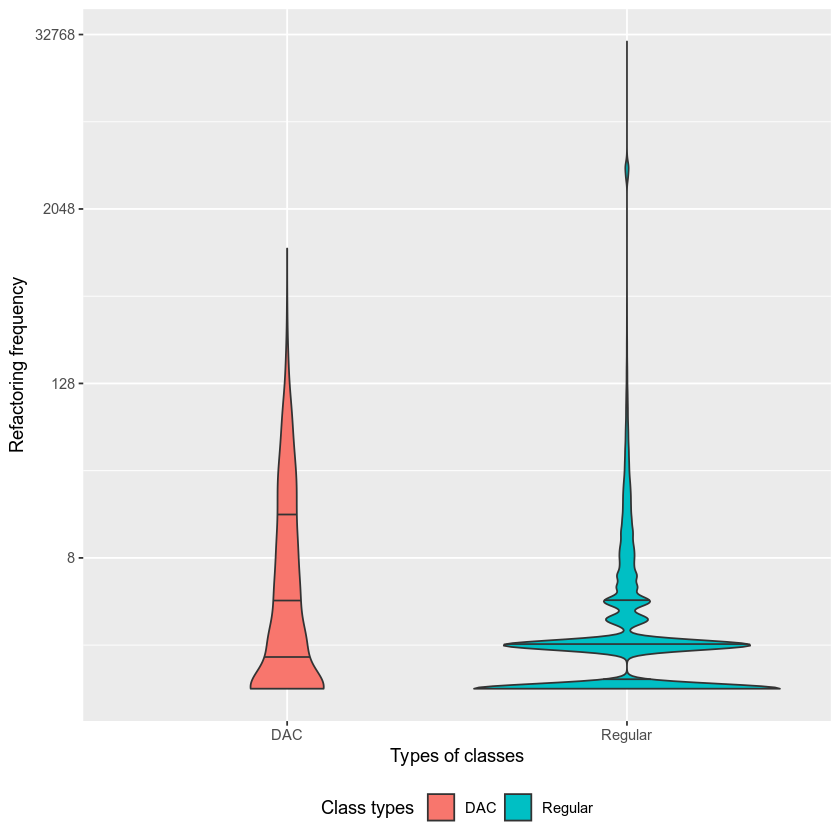

In [3]:
ggplot(refs, aes(fill=class.Type,x=as.factor(class.Type), y=count))+
scale_y_continuous(trans='log2')+
geom_violin(position = "dodge",draw_quantiles=c(0.25, 0.5, 0.75)) +
xlab("Types of classes") + 
ylab (expression(paste("Refactoring frequency"))) +
scale_fill_discrete(name = "Class types")+
theme(legend.position = "bottom")
ggsave("RQ1_number_dac_reg.pdf",width=6, height = 4, units = "in")

In [5]:
#compute the median and mean
dac<- subset(refs, class.Type == "DAC")
reg<- subset(refs, class.Type == "Regular")

In [6]:
summary(dac)
summary(reg)
reg_sampled<- sample_n(reg, 1318)

   class.Type       count        
 DAC    :1318   Min.   :   1.00  
 Regular:   0   1st Qu.:   1.00  
                Median :   2.00  
                Mean   :  14.98  
                3rd Qu.:  11.00  
                Max.   :1092.00  

   class.Type        count         
 DAC    :    0   Min.   :    1.00  
 Regular:81873   1st Qu.:    1.00  
                 Median :    2.00  
                 Mean   :   31.18  
                 3rd Qu.:    3.00  
                 Max.   :29337.00  

In [7]:
summary(reg_sampled)

   class.Type       count        
 DAC    :   0   Min.   :   1.00  
 Regular:1318   1st Qu.:   1.00  
                Median :   2.00  
                Mean   :  17.47  
                3rd Qu.:   3.00  
                Max.   :3391.00  

In [14]:
#perform statiscial test and also check class complexity as explaining factor or basically the refactoring hotspots and why they are there

#Run Wilcoxon rank sum test or Mann-Whitney test
wilcox.test(reg_sampled$count, dac$count,  conf.int = TRUE)



	Wilcoxon rank sum test with continuity correction

data:  reg_sampled$count and dac$count
W = 695702, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -9.999495e-01 -5.435293e-05
sample estimates:
difference in location 
         -1.883081e-05 
